<a href="https://colab.research.google.com/github/NickKornienko/Clustering/blob/main/Clustering_timeseries_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 6.4 MB/s eta 0:00:00


In [2]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Synthetic data
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

In [4]:
# Normalize the data
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Create a model
model = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=10)
model.fit(X_train)

TimeSeriesKMeans(max_iter=10)

In [6]:
# Preform clustering
y_pred = model.predict(X_test)

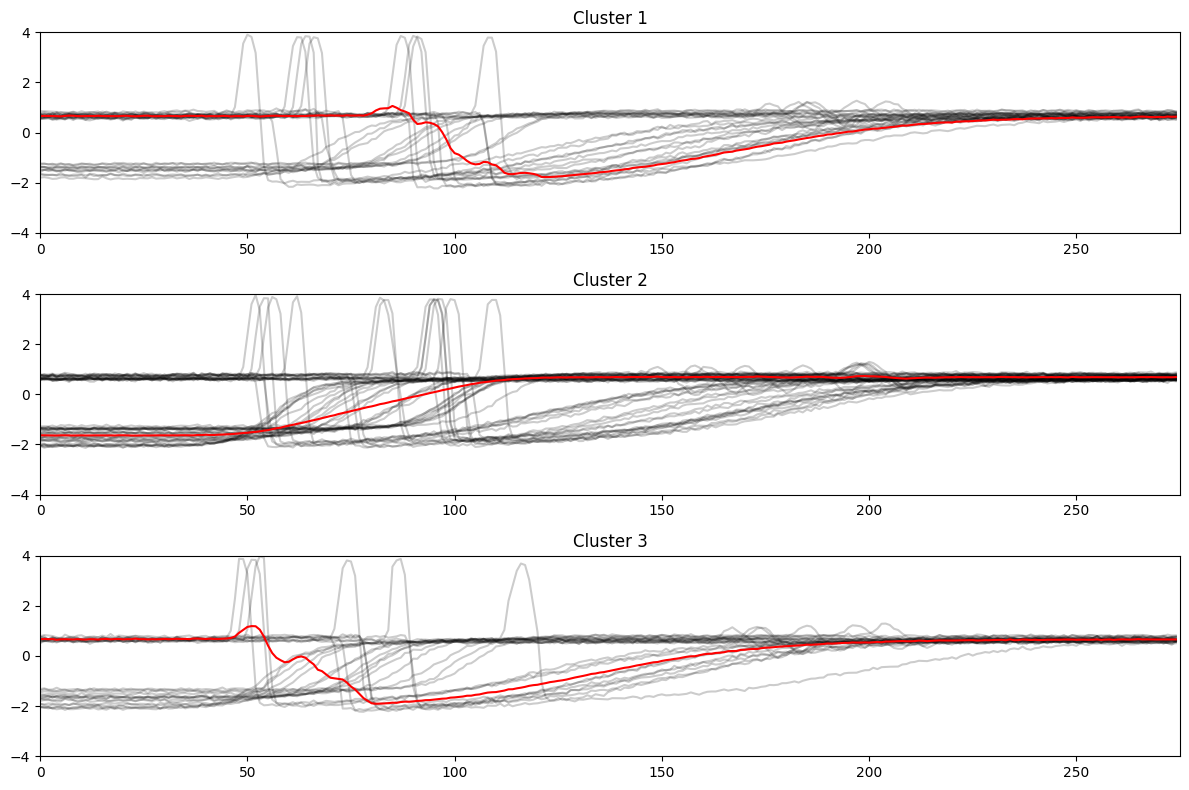

In [7]:
# Visualizing the Clusters
plt.figure(figsize=(12, 8))
for yi in range(3):
    plt.subplot(3, 1, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, X_train.shape[1])
    plt.ylim(-4, 4)
    plt.title(f"Cluster {yi + 1}")
plt.tight_layout()
plt.show()